In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pymongo
from pymongo import MongoClient
import json

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem.porter import PorterStemmer

import wordcloud
from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt

import collections
from collections import Counter

In [4]:
#importing all necessary modules
import pandas as pd
import numpy as np
import re as regex
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cheta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#storing it in a dataframe
dataf = pd.read_csv('mbti_1.csv')
#checking whether the data frame loads or not
dataf.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [6]:
#Preprocessing the data to store it in a optimized way in DB

#Copy the original data-set
datafcopy = dataf.copy();

#Lowercasing
datafcopy["posts"] = datafcopy["posts"].apply(lambda dataflowercase: dataflowercase.lower())

#Remove links 
datafcopy["posts"] = datafcopy["posts"].apply(lambda LinksRemoval: regex.sub(r'https?:\/\/.*?[\s+]', '', LinksRemoval))
    

#Remove stop-words
stopWords = nltk.corpus.stopwords.words('english')
stopWords.extend(['enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp', 'infj', 'infp', 'intj', 'intp', 'isfj', 'isfp', 'istj', 'istp'])
regexPatStopWords = r'\b(?:{})\b'.format('|'.join(stopWords))
datafcopy["posts"] = datafcopy["posts"].str.replace(regexPatStopWords, '')


#Remove non words
datafcopy["posts"] = datafcopy["posts"].apply(lambda nonWordsRemoval: regex.sub(r'[^a-zA-Z\s]','', nonWordsRemoval))

(datafcopy.head())

,type,posts
0,INFJ,moments sportscenter top ten plays pran...
1,ENTP,finding lack posts alarmingsex boring...
2,INTP,good one course say know blessing ...
3,INTJ,dear enjoyed conversation day esoteric...
4,ENTJ,fired another silly misconception approachin...


In [9]:
# Stemming
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

datafcopy['posts'] = get_stemmed_text(datafcopy['posts'])
(datafcopy.head())

,type,posts
0,INFJ,moment sportscent top ten play prank lifechang...
1,ENTP,find lack post alarmingsex bore posit often ex...
2,INTP,good one cour say know bless cur absolut posit...
3,INTJ,dear enjoy conver day esot gab natur univ idea...
4,ENTJ,fire anoth silli misconcept approach logic go ...


In [10]:
#Exporting Data
datafcopy.to_csv(index=False)
compression_output = dict(method='zip', archive_name='out.csv')  
datafcopy.to_csv('out.zip', index=False, compression=compression_output) 

In [11]:
# Converting MBTI personality (or target or Y feature) into numerical form using Label Encoding
# encoding personality type
#Define target and train to split training and testing data sets
enc = LabelEncoder()
datafcopy['type of encoding'] = enc.fit_transform(datafcopy['type'])
target = datafcopy['type of encoding']

In [12]:
# Vectorizing the posts for the model and filtering Stop-words
vect = CountVectorizer(stop_words='english') 

#Converting posts (or training or X feature) into numerical form by count vectorization
train =  vect.fit_transform(datafcopy["posts"])
print(train.shape)

(8675, 168645)


In [13]:
#Dividing the model into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.20, stratify=target, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(6940, 168645) (6940,) (1735, 168645) (1735,)


In [14]:
#Using Gradient Descent Algorithm
sgd = SGDClassifier(max_iter=10, tol=None)
sgd.fit(X_train, y_train)

Y_pred = sgd.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuraciesSGD = {}
accuracySGD = accuracy_score(y_test, predictions)
accuraciesSGD['Gradient Descent'] = accuracySGD * 100.0
print("Accuracy: %.2f%%" % (accuracySGD * 100.0))

Accuracy: 40.92%


In [15]:
#Random Forest
accuraciesRF = {}
random_forest = RandomForestClassifier(n_estimators=100, random_state = 1)
random_forest.fit(X_train, y_train)

# make predictions for test data
Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracyRF = accuracy_score(y_test, predictions)
accuraciesRF['Random Forest'] = accuracyRF * 100.0 
print("Accuracy: %.2f%%" % (accuracyRF * 100.0))

Accuracy: 29.63%


In [16]:
#Linear Regression
accuraciesLR = {}
lr = LinearRegression()
random_forest.fit(X_train, y_train)

# make predictions for test data
Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracyLR = accuracy_score(y_test, predictions)
accuraciesLR['Linear Regression'] = accuracyLR * 100.0 
print("Accuracy: %.2f%%" % (accuracyLR * 100.0))

Accuracy: 29.63%


In [17]:
#Prediction of personality type

cntizer = CountVectorizer(analyzer="word", max_features=1000) 
X_trainExample =  cntizer.fit_transform(datafcopy['posts'])
tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_trainExample).toarray()
print(X_tfidf)

X = X_tfidf
Y = datafcopy['type of encoding']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=target, random_state=42)


sgd = SGDClassifier(max_iter=10, tol=None)
sgd.fit(X_train, y_train)


my_post_text = "Open minded and introverted"
my_post = pd.DataFrame([[my_post_text]])
my_post = [str (item) for item in my_post]

my_X_cnt = cntizer.transform(my_post)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

Y_pred = sgd.predict(my_X_tfidf)

print(Y_pred[0])

result = "Default"    
if (Y_pred[0]) == 0:
  result = 'Personality type: ENFJ'
elif (Y_pred[0]) == 1:
  result = 'Personality type: ENFP'
elif (Y_pred[0]) == 2:
  result = 'Personality type: ENTJ'
elif (Y_pred[0]) == 3:
  result = 'Personality type: ENTP'
elif (Y_pred[0]) == 4:
  result = 'Personality type: ESFJ'
elif (Y_pred[0]) == 5:
  result = 'Personality type: ESFP'
elif (Y_pred[0]) == 6:
  result = 'Personality type: ESTJ'
elif (Y_pred[0]) == 7:
  result = 'Personality type: ESTP'
elif (Y_pred[0]) == 8:
  result = 'Personality type: INFJ'
elif (Y_pred[0]) == 9:
  result = 'Personality type: INFP'
elif (Y_pred[0]) == 10:
  result = 'Personality type: INTJ'
elif (Y_pred[0]) == 11:
  result = 'Personality type: INTP'
elif (Y_pred[0]) == 12:
  result = 'Personality type: ISFJ'
elif (Y_pred[0]) == 13:
  result = 'Personality type: ISFP'
elif (Y_pred[0]) == 14:
  result = 'Personality type: ISTJ'
elif (Y_pred[0]) == 15:
  result = 'Personality type: ISTP'
else:
  result = 'UNKNOWN'

print(result)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03756349 0.         ... 0.         0.         0.        ]
 [0.13555263 0.04903063 0.11271052 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05489448 0.         ... 0.         0.         0.        ]
 [0.         0.03222016 0.         ... 0.04343112 0.         0.        ]]
11
Personality type: INTP


In [36]:
#Connect to DB
db_connect = pymongo.MongoClient("localhost", 27017)
database_name = 'mbti'
database = db_connect[database_name]

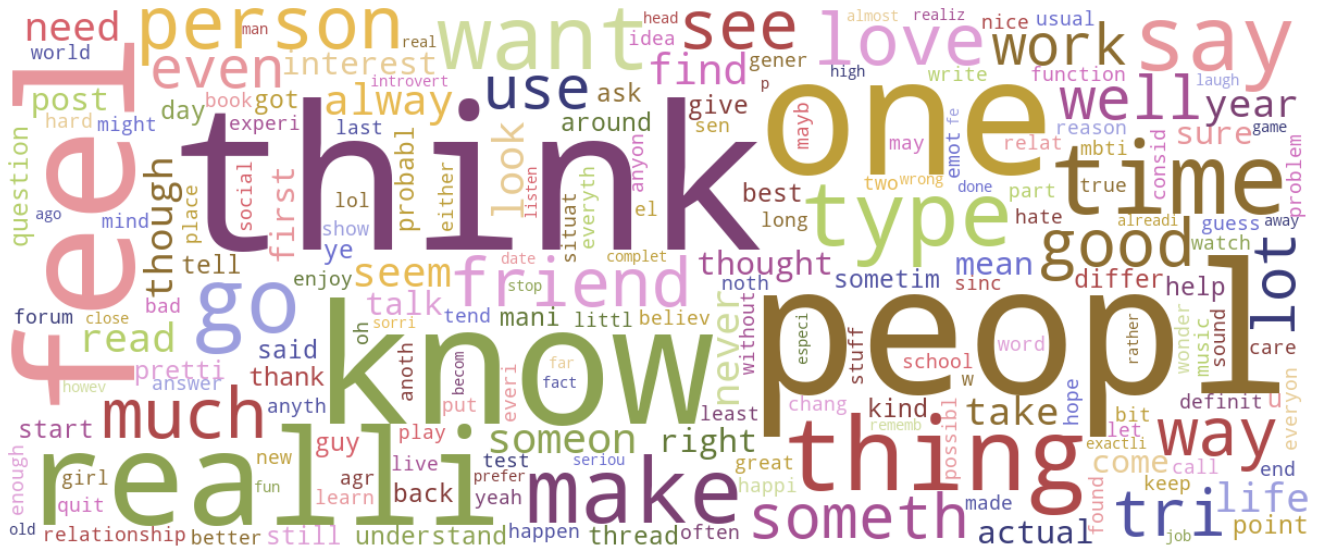

In [29]:
#Finding the most common words in all posts.
words = list(datafcopy["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]

Counter(words).most_common(40)

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [38]:
PI_Collection = database.get_collection("mbti_personality_indicator")



columnsINFJ = list(PI_Collection.find({"type": "INFJ"}))

columnsINFJ
datafINFJ = pd.DataFrame(columnsINFJ)


In [40]:
datafINFJPosts = datafINFJ["posts"]

datafINFJPosts

0       moment sportscent top ten play prank lifechang...
1       draw nail haha done profession nail ye gel mea...
2       sure good question distinct two depend percept...
3       one time parent fight dad affair dad push mom ...
4       joe santagato sure type yet know heavi fi make...
                              ...                        
1465    play cello also classic train soprano play pia...
1466    think real question whether infj neat domin fu...
1467    find poster facial express along fact iron lma...
1468    rim approxim order seem like make decis right ...
1469    sure method pick music artist anoth name throw...
Name: posts, Length: 1470, dtype: object

Text(0.5, 1.0, 'INFJ')

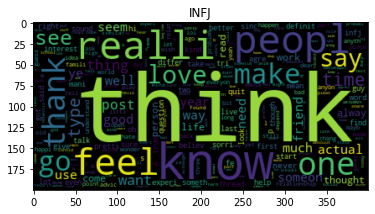

In [41]:
postType = "INFJ"
df_INFJ = datafINFJPosts
wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_INFJ.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(postType)

Text(0.5, 1.0, 'INFP')

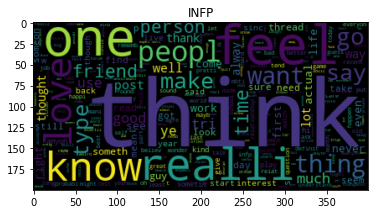

In [42]:
columnsINFP = list(PI_Collection.find({"type": "INFP"}))
datafINFP = pd.DataFrame(columnsINFP)
datafINFPPosts = datafINFP["posts"]
datafINFPPosts

postType = "INFP"
df_INFP = datafINFPPosts
wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_INFP.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(postType)

Text(0.5, 1.0, 'ENTP')

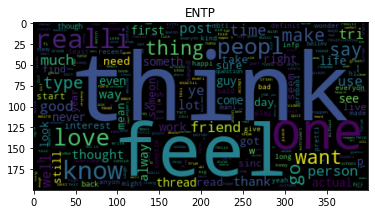

In [43]:
columnsENTP = list(PI_Collection.find({"type": "ENTP"}))
datafENTP = pd.DataFrame(columnsENTP)
datafENTPPosts = datafENTP["posts"]
datafENTPPosts

postType = "ENTP"
df_ENTP = datafINFPPosts
wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_ENTP.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(postType)

Text(0.5, 1.0, 'ENFP')

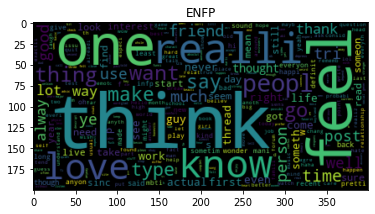

In [45]:
columnsENFP = list(PI_Collection.find({"type": "ENFP"}))
datafENFP = pd.DataFrame(columnsENFP)
datafENFPPosts = datafENFP["posts"]
datafENFPPosts

postType = "ENFP"
df_ENFP = datafINFPPosts
wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_ENFP.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(postType)

Text(0.5, 1.0, 'ENTJ')

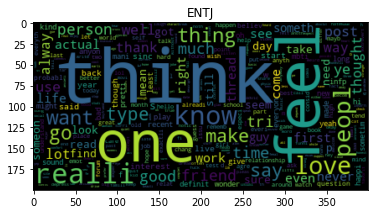

In [46]:
columnsENTJ = list(PI_Collection.find({"type": "ENTJ"}))
datafENTJ = pd.DataFrame(columnsENTJ)
datafENTJPosts = datafENTJ["posts"]
datafENTJPosts

postType = "ENTJ"
df_ENTJ = datafINFPPosts
wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_ENTJ.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(postType)

Text(0.5, 1.0, 'ESFP')

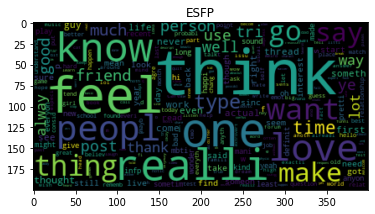

In [47]:
columnsESFP = list(PI_Collection.find({"type": "ESFP"}))
datafESFP = pd.DataFrame(columnsESFP)
datafESFPPosts = datafESFP["posts"]
datafESFPPosts

postType = "ESFP"
df_ESFP = datafINFPPosts
wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_ESFP.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(postType)

Text(0.5, 1.0, 'ESTP')

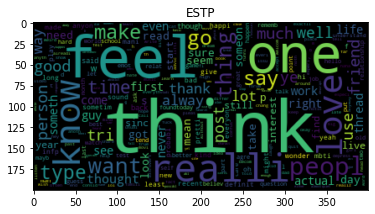

In [48]:
columnsESTP = list(PI_Collection.find({"type": "ESTP"}))
datafESTP = pd.DataFrame(columnsESTP)
datafESTPPosts = datafESTP["posts"]
datafESTPPosts

postType = "ESTP"
df_ESTP = datafINFPPosts
wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_ESTP.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(postType)

Text(0.5, 1.0, 'INFP')

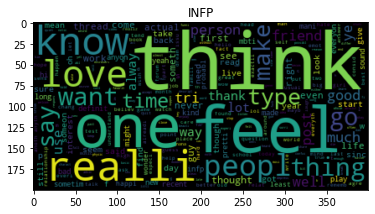

In [51]:
columnsINFP = list(PI_Collection.find({"type": "INFP"}))
datafINFP = pd.DataFrame(columnsINFP)
datafINFPPosts = datafINFP["posts"]
datafINFPPosts

postType = "INFP"
df_INFP = datafINFPPosts
wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_ESTP.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(postType)

Text(0.5, 1.0, 'INTJ')

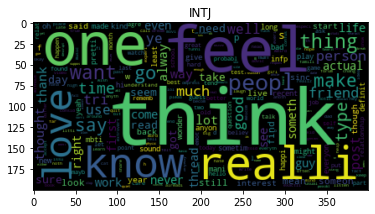

In [53]:
columnsINTJ = list(PI_Collection.find({"type": "INTJ"}))
datafINTJ = pd.DataFrame(columnsESTP)
datafINTJPosts = datafINTJ["posts"]
datafINTJPosts

postType = "INTJ"
df_INTJ = datafINFPPosts
wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_ESTP.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(postType)

Text(0.5, 1.0, 'ISFJ')

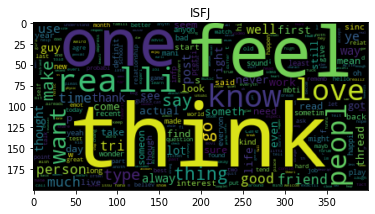

In [54]:
columnsISFJ = list(PI_Collection.find({"type": "ISFJ"}))
datafISFJ = pd.DataFrame(columnsISFJ)
datafISFJPosts = datafISFJ["posts"]
datafISFJPosts

postType = "ISFJ"
df_ISFJ = datafINFPPosts
wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_ISFJ.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(postType)

Text(0.5, 1.0, 'ISFP')

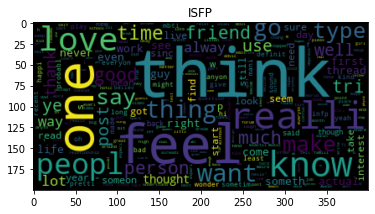

In [55]:
columnsISFP = list(PI_Collection.find({"type": "ISFP"}))
datafISFP = pd.DataFrame(columnsISFP)
datafISFPPosts = datafISFP["posts"]
datafISFPPosts

postType = "ISFP"
df_ISFP = datafINFPPosts
wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_ISFP.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(postType)

Text(0.5, 1.0, 'ISTJ')

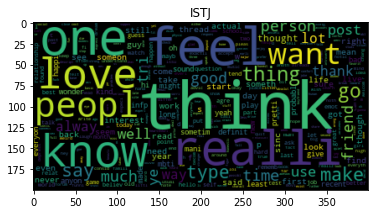

In [56]:
columnsISTJ = list(PI_Collection.find({"type": "ISTJ"}))
datafISTJ = pd.DataFrame(columnsISTJ)
datafISTJPosts = datafISTJ["posts"]
datafISTJPosts

postType = "ISTJ"
df_ISTJ = datafINFPPosts
wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_ISTJ.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(postType)

Text(0.5, 1.0, 'ISTP')

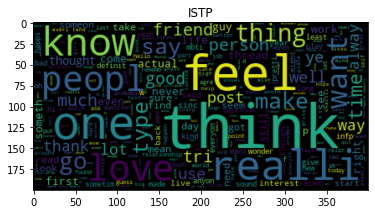

In [57]:
columnsISTP = list(PI_Collection.find({"type": "ISTP"}))
datafISTP = pd.DataFrame(columnsISTP)
datafISTPPosts = datafISTP["posts"]
datafISTPPosts

postType = "ISTP"
df_ISTP = datafINFPPosts
wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_ISTP.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(postType)